#### Loading the required content from google drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Unzip the dataset folder**

**Importing required liberaries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization, Dropout

import os
import math
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.metrics import classification_report, confusion_matrix



## **Data Preprocessing**

**Renaming the file name of unzipped valid directory**

In [11]:
valid_dir = '/content/dataset/valid'
valid_dir_file = os.listdir(valid_dir)
print('Files in valid dir:', valid_dir_file)


for f in valid_dir_file:
  if "images" in f: 
    os.rename(valid_dir+'/'+f, valid_dir+'/images.csv')
  else:
    os.rename(valid_dir+'/'+f, valid_dir+'/labels.csv')

valid_dir_file = os.listdir(valid_dir)
print('After Renaming Files in valid dir:', valid_dir_file)

Files in valid dir: ['images (1).csv', 'labels (1).csv']
After Renaming Files in valid dir: ['labels.csv', 'images.csv']


**Directory path**

In [12]:
train_image_csv_path = "/content/dataset/train/images.csv"
train_label_csv_path = "/content/dataset/train/labels.csv"

valid_image_csv_path = "/content/dataset/valid/images.csv"
valid_label_csv_path = "/content/dataset/valid/labels.csv"

**Labels to be used for classification**

In [13]:
classes = ['squiggle', 'narrowband', 'narrowbanddrd', 'noise']
print(classes)

['squiggle', 'narrowband', 'narrowbanddrd', 'noise']


**Loading Train images .csv file in to dataframe**

In [14]:
df_train_image = pd.read_csv(train_image_csv_path, header=None)
df_train_image

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,0.729412,0.725490,0.619608,0.674510,0.643137,0.705882,0.713726,0.658824,0.615686,0.690196,0.654902,0.525490,0.556863,0.541176,0.482353,0.588235,0.615686,0.600000,0.603922,0.627451,0.678431,0.658824,0.698039,0.576471,0.678431,0.686275,0.690196,0.705882,0.705882,0.643137,...,0.650980,0.666667,0.666667,0.709804,0.682353,0.682353,0.682353,0.658824,0.682353,0.643137,0.627451,0.623529,0.650980,0.721569,0.627451,0.635294,0.709804,0.690196,0.678431,0.647059,0.658824,0.682353,0.654902,0.694118,0.741176,0.678431,0.662745,0.729412,0.694118,0.647059,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,0.678431,0.709804,0.713726,0.686275,0.717647,0.713726,0.694118,0.690196,0.721569,0.701961,0.698039,0.713726,0.705882,0.756863,0.756863,0.694118,0.650980,0.674510,0.752941,0.725490,0.725490,0.760784,0.678431,0.717647,0.725490,0.682353,0.709804,0.729412,0.721569,0.717647,...,0.686275,0.670588,0.713726,0.733333,0.725490,0.694118,0.694118,0.686275,0.674510,0.729412,0.721569,0.701961,0.682353,0.709804,0.756863,0.698039,0.729412,0.721569,0.674510,0.698039,0.725490,0.733333,0.666667,0.682353,0.701961,0.737255,0.745098,0.725490,0.698039,0.650980,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,0.690196,0.670588,0.662745,0.666667,0.713726,0.701961,0.721569,0.713726,0.662745,0.698039,0.682353,0.639216,0.717647,0.658824,0.674510,0.639216,0.643137,0.635294,0.654902,0.682353,0.639216,0.733333,0.690196,0.658824,0.686275,0.658824,0.690196,0.698039,0.709804,0.650980,...,0.533333,0.572549,0.537255,0.549020,0.670588,0.690196,0.670588,0.643137,0.662745,0.713726,0.717647,0.721569,0.709804,0.674510,0.709804,0.686275,0.658824,0.694118,0.698039,0.694118,0.678431,0.678431,0.690196,0.662745,0.650980,0.650980,0.686275,0.631373,0.666667,0.701961,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,0.631373,0.650980,0.670588,0.737255,0.674510,0.615686,0.670588,0.705882,0.686275,0.678431,0.694118,0.647059,0.662745,0.682353,0.654902,0.721569,0.709804,0.631373,0.670588,0.674510,0.701961,0.725490,0.666667,0.647059,0.733333,0.682353,0.678431,0.603922,0.666667,0.713726,...,0.670588,0.705882,0.749020,0.662745,0.564706,0.623529,0.674510,0.709804,0.658824,0.631373,0.705882,0.670588,0.658824,0.690196,0.674510,0.658824,0.635294,0.682353,0.682353,0.639216,0.666667,0.654902,0.647059,0.670588,0.682353,0.639216,0.705882,0.729412,0.674510,0.666667,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,0.631373,0.709804,0.694118,0.698039,0.666667,0.690196,0.690196,0.682353,0.682353,0.647059,0.678431,0.658824,0.760784,0.729412,0.674510,0.694118,0.698039,0.713726,0.690196,0.698039,0.686275,0.705882,0.662745,0.670588,0.705882,0.682353,0.690196,0.733333,0.709804,0.701961,...,0.639216,0.690196,0.662745,0.658824,0.662745,0.698039,0.603922,0.690196,0.627451,0.627451,0.654902,0.725490,0.650980,0.717647,0.666667,0.709804,0.682353,0.674510,0.721569,0.741176,0.635294,0.615686,0.674510,0.690196,0.658824,0.694118,0.701961,0.670588,0.721569,0.780392,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412
...,...,...,...,...,...,...,...,...,...,...,...,...,...

**Shape of train csv data**

In [15]:
df_train_image.shape

(3200, 8192)

**Loading Train label .csv file in to dataframe**

In [16]:
df_train_label = pd.read_csv(train_label_csv_path, header=None, names= ['squiggle', 'narrowband', 'narrowbanddrd', 'noise'])
df_train_label

,squiggle,narrowband,narrowbanddrd,noise
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
3195,0.0,1.0,0.0,0.0
3196,0.0,1.0,0.0,0.0
3197,0.0,1.0,0.0,0.0
3198,0.0,1.0,0.0,0.0


**Train label shape**

In [17]:
df_train_label.shape

(3200, 4)

**Loading validation image .csv file in to dataframe**

In [18]:
df_valid_image = pd.read_csv(valid_image_csv_path, header=None)
df_valid_image

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.686275,0.725490,0.737255,0.694118,0.658824,0.674510,0.643137,0.752941,0.678431,0.654902,0.658824,0.698039,0.729412,0.709804,0.682353,0.658824,0.698039,0.670588,0.662745,0.658824,0.717647,0.682353,0.694118,0.745098,0.682353,0.725490,0.662745,0.705882,0.705882,0.713726,0.698039,0.698039,0.674510,0.686275,0.705882,0.698039,0.674510,0.686275,0.709804,0.686275,...,0.678431,0.690196,0.721569,0.690196,0.682353,0.678431,0.650980,0.701961,0.701961,0.635294,0.674510,0.639216,0.694118,0.717647,0.698039,0.698039,0.705882,0.650980,0.686275,0.654902,0.678431,0.662745,0.650980,0.666667,0.698039,0.741176,0.674510,0.670588,0.698039,0.662745,0.674510,0.709804,0.643137,0.674510,0.682353,0.658824,0.741176,0.658824,0.705882,0.701961
1,0.615686,0.631373,0.705882,0.678431,0.698039,0.639216,0.619608,0.654902,0.678431,0.682353,0.666667,0.690196,0.666667,0.647059,0.686275,0.725490,0.619608,0.686275,0.643137,0.674510,0.647059,0.662745,0.674510,0.639216,0.635294,0.694118,0.662745,0.658824,0.498039,0.552941,0.533333,0.615686,0.552941,0.623529,0.650980,0.694118,0.682353,0.674510,0.588235,0.627451,...,0.705882,0.694118,0.662745,0.639216,0.654902,0.678431,0.674510,0.666667,0.670588,0.635294,0.690196,0.682353,0.662745,0.682353,0.631373,0.647059,0.682353,0.627451,0.674510,0.654902,0.662745,0.654902,0.713726,0.678431,0.607843,0.694118,0.701961,0.635294,0.643137,0.627451,0.662745,0.674510,0.674510,0.721569,0.709804,0.666667,0.619608,0.709804,0.705882,0.682353
2,0.670588,0.690196,0.698039,0.647059,0.650980,0.670588,0.721569,0.701961,0.647059,0.678431,0.674510,0.733333,0.686275,0.643137,0.686275,0.658824,0.639216,0.658824,0.670588,0.639216,0.670588,0.690196,0.686275,0.643137,0.670588,0.690196,0.698039,0.674510,0.666667,0.705882,0.631373,0.658824,0.741176,0.670588,0.666667,0.690196,0.721569,0.698039,0.666667,0.666667,...,0.717647,0.658824,0.654902,0.674510,0.654902,0.721569,0.737255,0.647059,0.690196,0.674510,0.670588,0.647059,0.690196,0.647059,0.686275,0.709804,0.713726,0.658824,0.705882,0.737255,0.650980,0.643137,0.658824,0.650980,0.603922,0.474510,0.509804,0.678431,0.713726,0.658824,0.666667,0.670588,0.682353,0.698039,0.662745,0.619608,0.650980,0.662745,0.717647,0.650980
3,0.682353,0.650980,0.682353,0.670588,0.690196,0.701961,0.721569,0.709804,0.690196,0.650980,0.690196,0.694118,0.690196,0.670588,0.662745,0.737255,0.690196,0.674510,0.611765,0.674510,0.643137,0.627451,0.678431,0.709804,0.709804,0.678431,0.709804,0.741176,0.705882,0.694118,0.737255,0.721569,0.658824,0.647059,0.650980,0.686275,0.713726,0.682353,0.576471,0.537255,...,0.733333,0.639216,0.647059,0.725490,0.745098,0.643137,0.694118,0.670588,0.713726,0.725490,0.682353,0.717647,0.666667,0.682353,0.686275,0.647059,0.694118,0.705882,0.698039,0.666667,0.647059,0.666667,0.709804,0.654902,0.686275,0.745098,0.698039,0.682353,0.701961,0.717647,0.694118,0.737255,0.733333,0.717647,0.674510,0.678431,0.745098,0.705882,0.709804,0.717647
4,0.647059,0.690196,0.717647,0.666667,0.654902,0.639216,0.654902,0.674510,0.682353,0.674510,0.658824,0.662745,0.741176,0.698039,0.698039,0.705882,0.674510,0.698039,0.670588,0.713726,0.698039,0.647059,0.670588,0.694118,0.682353,0.650980,0.733333,0.662745,0.658824,0.694118,0.643137,0.698039,0.690196,0.690196,0.705882,0.729412,0.670588,0.670588,0.619608,0.698039,...,0.690196,0.705882,0.737255,0.666667,0.650980,0.650980,0.686275,0.670588,0.709804,0.690196,0.701961,0.662745,0.678431,0.694118,0.709804,0.674510,0.670588,0.709804,0.670588,0.666667,0.686275,0.654902,0.666667,0.705882,0.654902,0.650980,0.694118,0.658824,0.709804,0.717647,0.662745,0.682353,0.698039,0.705882,0.662745,0.678431,0.682353,0.725490,0.670588,0.658824
...,...,...,...,...,...,...,...,...,...,...,...,...,...

**Validation image csv data shape**

In [19]:
df_valid_image.shape

(800, 8192)

**Loading validation label .csv file in to dataframe**

In [20]:
df_valid_label = pd.read_csv(valid_label_csv_path, header=None, names= ['squiggle', 'narrowband', 'narrowbanddrd', 'noise'])
df_valid_label

,squiggle,narrowband,narrowbanddrd,noise
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
795,0.0,1.0,0.0,0.0
796,0.0,1.0,0.0,0.0
797,0.0,1.0,0.0,0.0
798,0.0,1.0,0.0,0.0


**Validation label shape**

In [21]:
df_valid_label.shape

(800, 4)

**Calculating  best fit shape for image pixel size of "8192"**

Best fit image size can be: 


*   32 X 256
*   **64 X 128**  (Used for image reshape)




In [22]:
for i in range(30, 500):
    if 8192 % i == 0:
        print(i)

32
64
128
256


**Declaring Image Width and height**

In [23]:
img_width = 128
img_height = 64

**Display dataset images**

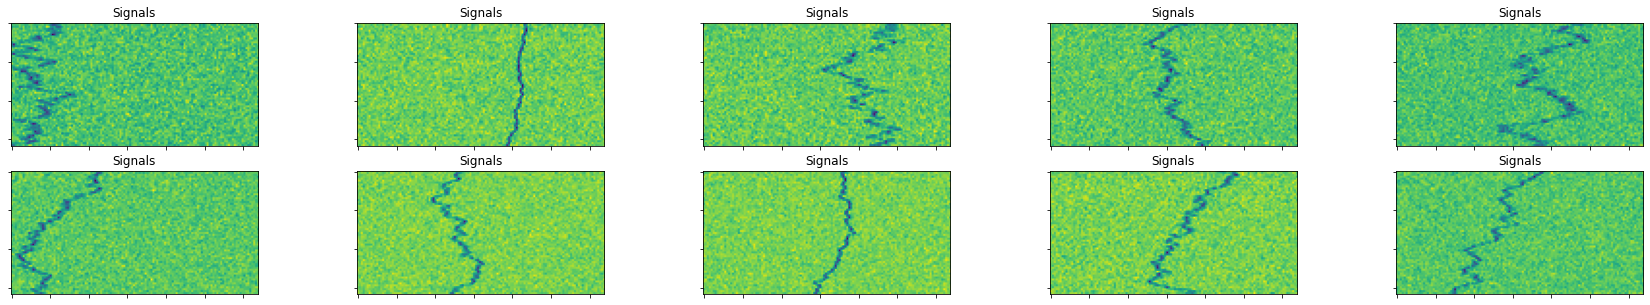

In [74]:
fig, axs = plt.subplots(2, 5, figsize=(30, 5))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()
for i in range(10):

    img = df_train_image.values[i][0:]
    #print(img)
    img = np.array(np.float32(img).reshape(img_height, img_width, 1))
    pil_img = tf.keras.preprocessing.image.array_to_img(img)

    axs[i].imshow(pil_img)
    axs[i].set_title('Signals')
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])

### **Reshape the image and save**

#### **Function created for preparing the image from pixel, reshape and save image in directory to used for ImageDataGenerator**

In [26]:
def SaveImage(df, label, path):
    
    if os.path.isdir(path):
            os.remove(path)
    
    
    for i in range(0, len(df)):
        im_buf = df.values[i][0:] # create flat array of only the pixels of the given image 
        im_array = np.array(np.reshape(im_buf, (img_height, img_width, 1))) # create a 2D array from flat array
        #img = Image.fromarray(im_array, 'L') # convert to a PIL.Image object ('L' is for grayscale)
        img = tf.keras.preprocessing.image.array_to_img(im_array)

        img_dir =path+'/'+label[i]
        CHECK_FOLDER = os.path.isdir(img_dir)

        # If folder doesn't exist, then create it.
        if not CHECK_FOLDER:
            os.makedirs(img_dir,mode=0o777)
        
        img.save(path+'/'+label[i]+'/'+str(i+1)+'.png')
        #plt.imshow(np.asarray(img))


#### **Function created to prepare the labels and return list of labels**

In [27]:
def Prepare_Y_data(df):
    for idx, row in df.iterrows():
        for label in classes:
            if df.loc[idx, str(label)] == 1:
                df.loc[idx, 'label'] = label
        
    return df['label']

#### **Function created to show image from directory for train and valid**

In [28]:
def show_image(path):
    
    list_img =[]
    list_label =[];
    for cls in classes:
        dir_images_list = os.listdir(path+'/'+cls+'/')
        for file in dir_images_list[:1]:
            
            img_path = path+'/'+cls+'/'+file
            image = cv2.imread(img_path,0)
            
            list_img.append(image)
            list_label.append(cls)
        
        
    i=0
    fig, axs = plt.subplots(1, 4, figsize=(30, 5))
    fig.subplots_adjust(hspace = .2, wspace=.1)
    axs = axs.ravel()
    for img in list_img[:4]:
        axs[i].imshow(img)
        axs[i].set_title(list_label[i])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        i+=1


**Directory to save image for train and valid**

In [29]:
train_image_dir = "./dataset/train/images"
valid_image_dir = "./dataset/valid/images"

#### **Function call to get labels for train and valid dataframe**

In [30]:
train_label = Prepare_Y_data(df_train_label)
valid_label = Prepare_Y_data(df_valid_label)

In [31]:
train_label.shape

(3200,)

#### **Preapre the image from the pixel of train dataframe and save it in to directory**

In [32]:
SaveImage(df_train_image, train_label, train_image_dir)

#### **Preapre the image from the pixel of valid dataframe and save it in to directory**

In [33]:
SaveImage(df_valid_image, valid_label, valid_image_dir)

#### **Show the saved train images from directory**

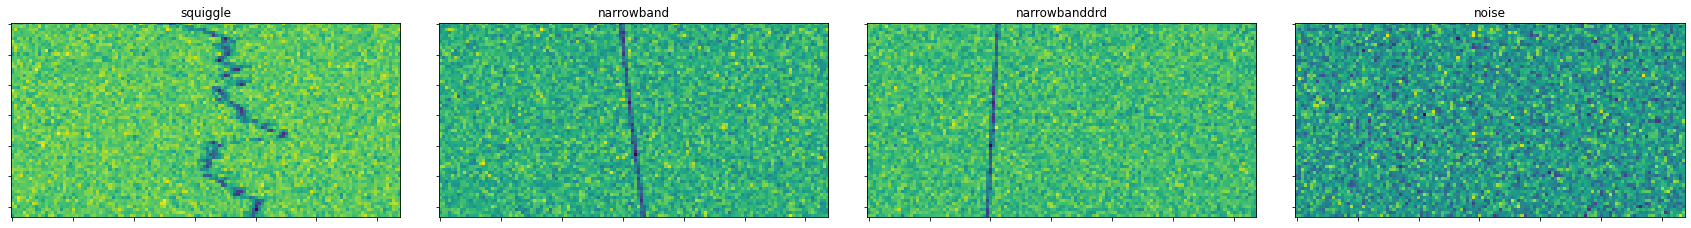

In [34]:
show_image(train_image_dir)

#### **Show the saved valid images from directory**

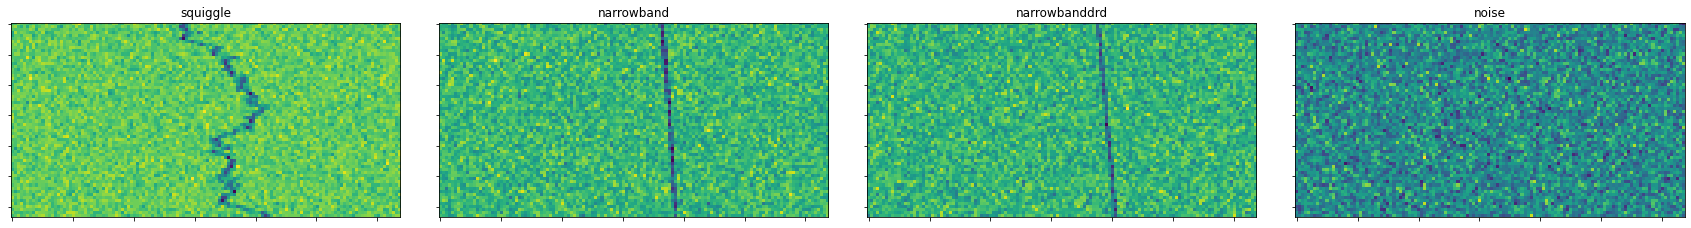

In [35]:
show_image(valid_image_dir)

### **Train data distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


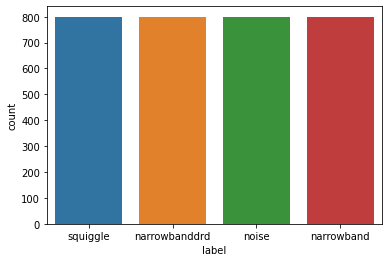

In [36]:
import seaborn as sns
sns.countplot(train_label)

### **Valid data distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


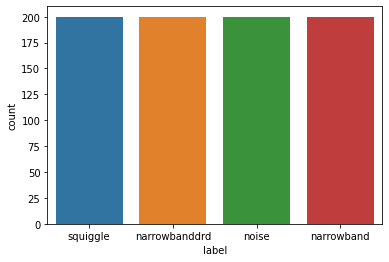

In [37]:
import seaborn as sns
sns.countplot(valid_label)

### **Create a function to plot the training stats** 

In [38]:
def training_stat_graph(training_model):
  # summarize training for accuracy
  plt.plot(training_model.history['accuracy'])
  plt.plot(training_model.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # summarize traning for loss
  plt.plot(training_model.history['loss'])
  plt.plot(training_model.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

## **Model Prepration**

####  **Generating the train and test data using ImageDataGenerator**

In [39]:
epochs = 20
batch_size = 32

train_datagen=ImageDataGenerator(rescale=1. /255, validation_split=0.2,)
test_datagen=ImageDataGenerator(rescale=1. /255)

train_generator =train_datagen.flow_from_directory(train_image_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical',classes=classes, subset='training')

training_val_generator =train_datagen.flow_from_directory(train_image_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical',classes=classes, subset='validation')

validation_generator =test_datagen.flow_from_directory(valid_image_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical',classes=classes)

Found 2560 images belonging to 4 classes.
Found 640 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


#### **Preparing input shape for model**

In [40]:
import tensorflow.keras.backend as k

if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

### **Defining the CNN model**

#### **Accuracy on test data: 0.75%**



*   3 Conv2D, MaxPooling and Activation layers
*   4 Dropout Layers
*   Flatten layers
*   2 Dense layers
*   1 Output activation dense layer



*   Activation Function : **Softmax**
*   Loss function: **Categorical Crossentropy**
*   Optimizer: **Adam**
*   Metrics: **Accuracy**
*   Batch size: **32**
*   Epochs: **12**


***Print the model summary***

In [41]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation= 'relu',input_shape= input_shape,name = 'conv1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(64,(2,3),activation= 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(128,(2,3),activation= 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(classes),activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 126, 62, 32)       896       
_________________________________________________________________
activation (Activation)      (None, 126, 62, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 31, 32)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 29, 64)        12352     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 29, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 12, 128)       4

#### **Fit the model with train and validtion data generator**

In [42]:
training = model.fit(train_generator, 
                     epochs=12, steps_per_epoch=len(train_generator), 
                     validation_data=training_val_generator, 

                     validation_steps = len(training_val_generator))

Epoch 1/12
80/80 [==============================] - 18s 20ms/step - loss: 0.8228 - accuracy: 0.5832 - val_loss: 0.4821 - val_accuracy: 0.7063
Epoch 2/12
80/80 [==============================] - 1s 17ms/step - loss: 0.5817 - accuracy: 0.7070 - val_loss: 0.4480 - val_accuracy: 0.7047
Epoch 3/12
80/80 [==============================] - 1s 17ms/step - loss: 0.5087 - accuracy: 0.7094 - val_loss: 0.4878 - val_accuracy: 0.7234
Epoch 4/12
80/80 [==============================] - 1s 17ms/step - loss: 0.6441 - accuracy: 0.6797 - val_loss: 0.5593 - val_accuracy: 0.6828
Epoch 5/12
80/80 [==============================] - 1s 17ms/step - loss: 0.4786 - accuracy: 0.7281 - val_loss: 0.4027 - val_accuracy: 0.7344
Epoch 6/12
80/80 [==============================] - 1s 17ms/step - loss: 0.3821 - accuracy: 0.7598 - val_loss: 0.3579 - val_accuracy: 0.7375
Epoch 7/12
80/80 [==============================] - 1s 17ms/step - loss: 0.4753 - accuracy: 0.7285 - val_loss: 0.4630 - val_accuracy: 0.7188
Epoch 8/12
8

#### **Training each epoch stats**

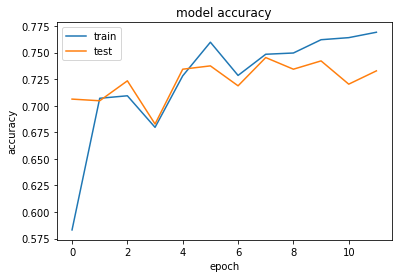

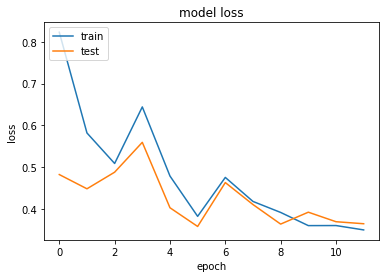

In [43]:
training_stat_graph(training)

### **Evaluate the model**

In [44]:
score = model.evaluate(validation_generator, batch_size=batch_size)
print(score)


25/25 [==============================] - 0s 13ms/step - loss: 0.3619 - accuracy: 0.7575
[0.36193519830703735, 0.7574999928474426]


## **Confusion Matrix and Classification Report**

**Predict the test data from model**

In [66]:
num_of_test_samples = len(valid_label)

Y_pred = model.predict(validation_generator, num_of_test_samples / batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


#### **Confusion Matrix**

In [67]:
print('Confusion Matrix', end="\n\n")
print(confusion_matrix(validation_generator.classes, y_pred, normalize= 'true'))


Confusion Matrix

[[0.255 0.505 0.015 0.225]
 [0.245 0.495 0.045 0.215]
 [0.205 0.46  0.025 0.31 ]
 [0.29  0.44  0.02  0.25 ]]


#### **Classification Report**

In [68]:
print('Classification Report', end="\n\n")

print(classification_report(validation_generator.classes, y_pred, target_names=classes))

Classification Report

               precision    recall  f1-score   support

     squiggle       0.26      0.26      0.26       200
   narrowband       0.26      0.49      0.34       200
narrowbanddrd       0.24      0.03      0.05       200
        noise       0.25      0.25      0.25       200

     accuracy                           0.26       800
    macro avg       0.25      0.26      0.22       800
 weighted avg       0.25      0.26      0.22       800

